In [2]:
pip install geopandas

     |████████████████████████████████| 1.0MB 2.9MB/s 
     |████████████████████████████████| 15.4MB 216kB/s 
     |████████████████████████████████| 6.6MB 39.8MB/s 


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from shapely.geometry import Point, Polygon
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
### For the plots
africa = gpd.read_file(r'/content/gdrive/MyDrive/rainfall-forecast/station_data/Africa_shapefile/afr_g2014_2013_0.shp')
crs={'init':'epsg:4326'}

In [6]:
### Prep all GSOD
gsod_all = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/GSOD_all_metadata.csv')
# print(gsod_all.columns)

gsod_filt = gsod_all[gsod_all.DATA_AVAILABILITY_2016_2020 >=0.70]

In [7]:
### Prep all TAHMO
tahmo_av = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Tahmo_av_correct_all.csv')
# print(tahmo_av)

tahmo_metadata = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/TAHMO_metadata_all.csv')
# print(tahmo_metadata)

tahmo_metadata=tahmo_metadata.loc[tahmo_metadata['station code'].isin(tahmo_av.Column1)]
# print(tahmo_metadata.columns)
# print(tahmo_metadata)
# tahmo_metadata = tahmo_metadata.drop(columns='Unnamed: 0', axis = 1)
# tahmo_metadata = tahmo_metadata.drop(columns='Unnamed: 0.1', axis = 1)
# print(tahmo_metadata.columns)

tahmo_metadata['data_availability'] = np.nan

for i in range(len(tahmo_av)):
  id = tahmo_av.Column1[i]
  av = tahmo_av.data_av[i]
  df1 = tahmo_metadata[tahmo_metadata['station code'].str.contains(id)]
  tahmo_metadata['data_availability'][df1.index] = av
# print(tahmo_metadata)

## Filter Tahmo data for >70%
tahmo_filt = tahmo_metadata[tahmo_metadata.data_availability >= 0.70]
# print(tahmo_filt)

tahmo_metadata.to_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/TAHMO_all.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
### Prep all WeatherImpact
burundi_all = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/WeatherImp_all_metadata.csv', sep = ';')
# print(burundi_all)

burundi_all = burundi_all.drop(columns='Unnamed: 4', axis = 1)
# print(burundi_all)

burundi_all= burundi_all.dropna(how='any')
# print(burundi_all)

burundi_av_all = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Burundi_Bob/burund_av.csv', sep=';',header=None)
burundi_av_all.drop(burundi_av_all.tail(2).index,inplace=True)
# print(burundi_av_all)

burundi_all['Data_availability'] = burundi_av_all[[1]]
# print(burundi_all)

## filter WI data >70%
burundi_filt = burundi_all[burundi_all.Data_availability >= 0.70]
# print(burundi_filt)

In [9]:
### final
final_filt = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/station_list_final_v2.csv')
print(final_filt.columns)


Index(['STNID', 'DATA_AVAILABILITY_2016_2020', 'NAME', 'ISO3C', 'LATITUDE',
       'LONGITUDE', 'ELEVATION', 'SOURCE'],
      dtype='object')


In [10]:
### CHIRPS BIAS STATIONS

bias = pd.read_csv('/content/gdrive/MyDrive/rainfall-forecast/precipitation_data/CHIRPS/Stations_used_for_Bias/Complete_CSV/BiasSt._Monthly_v2')
# print(bias)
bias_012020 = bias[bias['year/month'] == '2020/01']
bias_032019 = bias[bias['year/month'] == '2019/03']
# print(bias_032019.columns)


In [11]:
#merge the three station data
#plot a map of all the station data before filtering

# print(gsod_all.columns)

# print(tahmo_metadata.columns)

# print(burundi_all.columns)

gsod_all_new= gsod_all[['STNID','DATA_AVAILABILITY_2016_2020','LATITUDE','LONGITUDE']]
gsod_all_new.rename(columns= {'STNID': 'Station','DATA_AVAILABILITY_2016_2020': 'Data','LATITUDE':'Lat','LONGITUDE': 'Lon'}, inplace= True)

# print(gsod_all_new)

tahmo_new= tahmo_metadata[['station code', 'data_availability','latitude', 'longitude']]
tahmo_new.rename(columns= {'station code': 'Station','data_availability': 'Data','latitude':'Lat','longitude': 'Lon'}, inplace= True)
# print(tahmo_new)

burundi_new= burundi_all[['UMVA ID', 'Data_availability', 'Latitude', 'Longitude']]
burundi_new.rename(columns= {'UMVA ID': 'Station','Data_availability': 'Data','Latitude':'Lat','Longitude': 'Lon'}, inplace= True)
# print(burundi_new)

stations= [gsod_all_new, burundi_new, tahmo_new]
all_unfiltered = pd.concat(stations)
all_unfiltered_new = all_unfiltered.dropna(how='any')
# print(all_unfiltered_new)

all_unfiltered_new_1620 = all_unfiltered_new.reset_index(drop=True)
# print(all_unfiltered_new_1620)

all_filtered_new_1620 = all_unfiltered_new_1620[all_unfiltered_new_1620.Data >= 0.70]
# print(all_filtered_new_1620)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# print(gsod_all)

# print(tahmo_metadata.columns)

# print(burundi_all.columns)

gsod_all_new = gsod_all[['STNID','DATA_AVAILABILITY_1981_2020','LATITUDE','LONGITUDE']]
gsod_all_new.rename(columns= {'STNID': 'Station','DATA_AVAILABILITY_1981_2020': 'Data','LATITUDE':'Lat','LONGITUDE': 'Lon'}, inplace= True)

# print(gsod_all_new)

tahmo_new = tahmo_metadata[['station code', 'data_availability','latitude', 'longitude']]
tahmo_new.rename(columns= {'station code': 'Station','data_availability': 'Data','latitude':'Lat','longitude': 'Lon'}, inplace= True)
# print(tahmo_new)

burundi_new = burundi_all[['UMVA ID', 'Data_availability', 'Latitude', 'Longitude']]
burundi_new.rename(columns= {'UMVA ID': 'Station','Data_availability': 'Data','Latitude':'Lat','Longitude': 'Lon'}, inplace= True)
# print(burundi_new)

stations = [gsod_all_new, burundi_new]
all_unfiltered = pd.concat(stations)
stations = [all_unfiltered,tahmo_new]
all_unfiltered = pd.concat(stations)
all_unfiltered_new= all_unfiltered.dropna(how='any')
# print(all_unfiltered_new)

all_unfiltered_new_8120=all_unfiltered_new.reset_index(drop=True)
print(all_unfiltered_new_8120)

all_filtered_new_8120 = all_unfiltered_new_8120[all_unfiltered_new_8120.Data >= 0.70]
print(all_filtered_new_8120)

          Station      Data        Lat        Lon
0    626000-99999  0.380000  21.817000  31.483000
1    626150-99999  0.000000  22.217000  36.650000
2    626200-99999  0.010000  20.750000  32.550000
3    626400-99999  0.350000  19.533000  33.317000
4    626410-99999  0.390000  19.583000  37.217000
..            ...       ...        ...        ...
472       TA00699  0.093049  -0.707570  31.402138
473       TA00703  0.135742  -0.243396  31.481191
474       TA00707  0.166393  -0.089010  31.458015
475       TA00708  0.062945  -0.256226  31.352504
476       TA00709  0.038862   0.621200  32.369563

[477 rows x 4 columns]
          Station      Data        Lat        Lon
12   627210-99999  0.720000  15.589000  32.553000
71   634500-99999  0.710000   8.978000  38.799000
85   636120-99999  0.910000   3.122000  35.609000
92   636410-99999  0.740000   2.300000  37.900000
95   636610-99999  0.910000   0.972000  34.959000
..            ...       ...        ...        ...
292       TA00140  0.74165

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



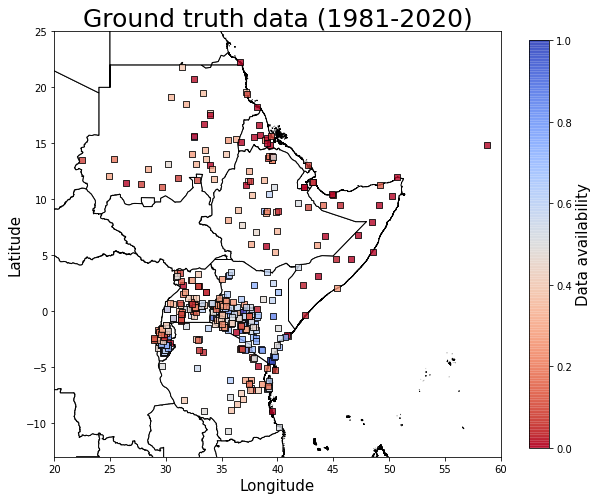

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(all_unfiltered_new_8120.Lon,all_unfiltered_new_8120.Lat,c=all_unfiltered_new_8120.Data,marker='s',cmap='coolwarm_r',vmin=0,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
plt.title('Ground truth data (1981-2020)', fontsize = 25)
plt.xlim([20,60])
plt.ylim([-13,25])
cb = plt.colorbar( shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=15)


plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_8120.png')

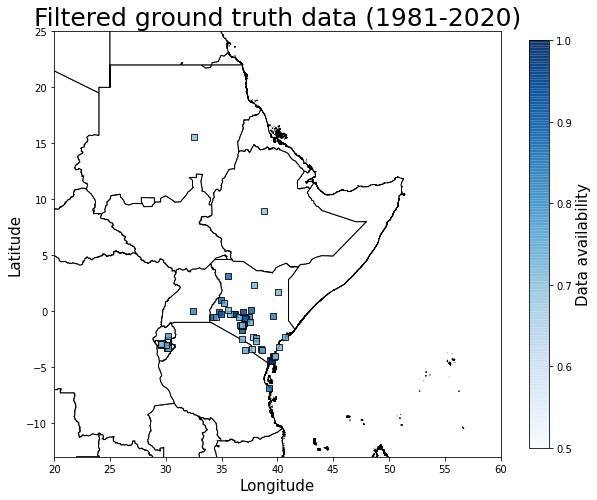

In [ ]:
# geometry=[Point(xy) for xy in zip(all_filtered_new_8120.Lon, all_filtered_new_8120.Lat)]
# geodata=gpd.GeoDataFrame(all_filtered_new_8120,crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
# geodata.plot(ax=ax, c=all_neww.Data, markersize=5);
plt.scatter(all_filtered_new_8120.Lon,all_filtered_new_8120.Lat,c=all_filtered_new_8120.Data,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
plt.title('Filtered ground truth data (1981-2020)', fontsize = 25)
plt.xlim([20,60])
plt.ylim([-13,25])
cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=15)


plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_filt_8120.png')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



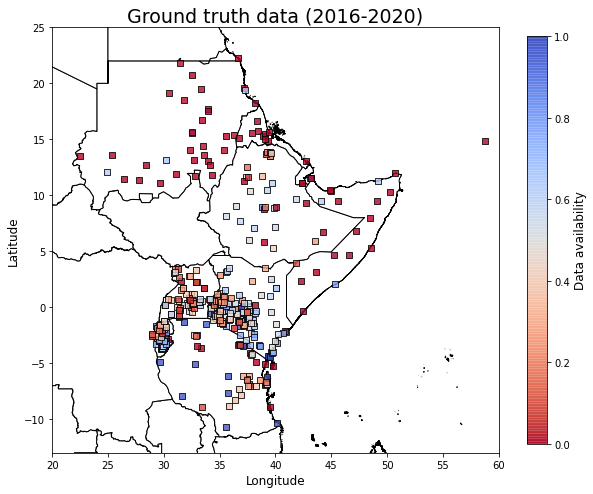

In [ ]:
geometry=[Point(xy) for xy in zip(all_unfiltered_new_1620.Lon, all_unfiltered_new_1620.Lat)]
geodata=gpd.GeoDataFrame(all_unfiltered_new_1620,crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
# geodata.plot(ax=ax, c=all_neww.Data, markersize=5);
plt.scatter(all_unfiltered_new_1620.Lon,all_unfiltered_new_1620.Lat,c=all_unfiltered_new_1620.Data,marker='s',cmap='coolwarm_r',vmin=0,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Ground truth data (2016-2020)',fontsize = 19)
plt.xlim([20,60])
plt.ylim([-13,25])

cb = plt.colorbar( shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)


# plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_1620.png')

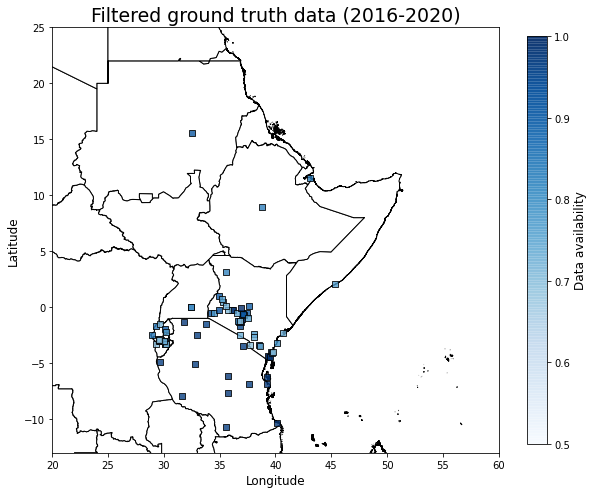

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
# geodata.plot(ax=ax, c=all_neww.Data, markersize=5);
plt.scatter(all_filtered_new_1620.Lon,all_filtered_new_1620.Lat,c=all_filtered_new_1620.Data,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Filtered ground truth data (2016-2020)',fontsize = 19)
plt.xlim([20,60])
plt.ylim([-13,25])

cb = plt.colorbar( shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)


# plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_filt_1620.png')

In [ ]:
gsod012020=gsod_filt[~gsod_filt['STNID'].isin(bias_012020.STNID)]
# print(gsod012020)

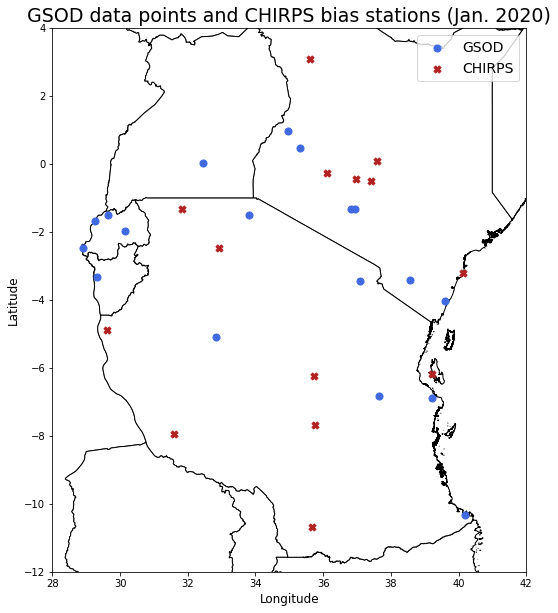

In [ ]:
### plot GSOD data and CHIRPS
# bias_012020 
# bias_032019 


fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(gsod012020.LONGITUDE,gsod012020.LATITUDE, c = 'royalblue',s=50)
plt.scatter(bias_012020.longitude, bias_012020.latitude, c='firebrick', marker='X', s=50)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('GSOD data points and CHIRPS bias stations (Jan. 2020)', fontsize = 19)
# plt.xlim([20,60])
# plt.ylim([-13,25])
plt.xlim([28,42])
plt.ylim([-12,4])
lg = ax.legend(('GSOD','CHIRPS'),prop={"size":14},loc=0)


plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/GSOD_CHIRPS.png')


Text(41.5, -12.183, '(-12.183, 41.194)')

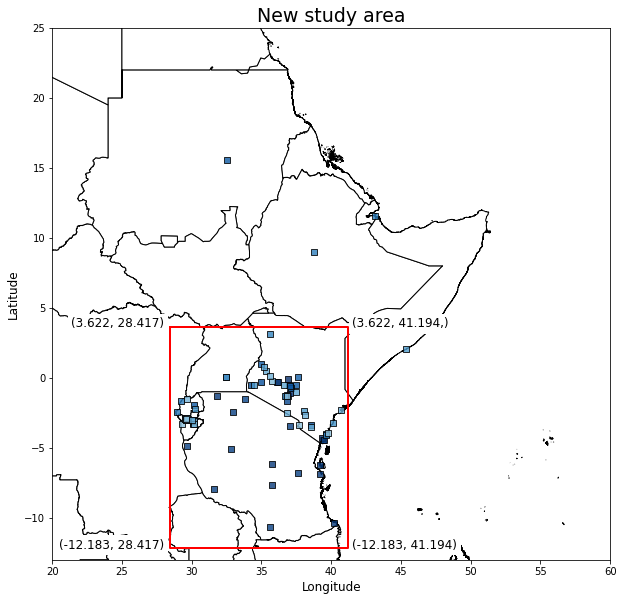

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)

rectangleX = [28.417, 28.417,41.194 ,41.194 , 28.417]
rectangleY = [3.622, -12.183, -12.183,3.622, 3.622]
plt.plot(rectangleX, rectangleY, '-', c='red',linewidth=2)
plt.scatter(all_filtered_new_1620.Lon,all_filtered_new_1620.Lat,c=all_filtered_new_1620.Data,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')

plt.title('New study area', fontsize = 19)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.xlim([20,60])
plt.ylim([-13,25])

plt.text(28,3.622,'(3.622, 28.417)',horizontalalignment = 'right', bbox={'alpha': 1, 'pad': 3,'color':'white'}, size = 12)
plt.text(28,-12.183,'(-12.183, 28.417)',horizontalalignment = 'right', bbox={'alpha': 1, 'pad': 3,'color':'white'}, size = 12)
plt.text(41.5,3.622,'(3.622, 41.194,)', bbox={'alpha': 1, 'pad': 3,'color':'white'}, size = 12)
plt.text(41.5,-12.183,'(-12.183, 41.194)', bbox={'alpha': 1, 'pad': 3,'color':'white'}, size = 12)

# plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Study_area.png')

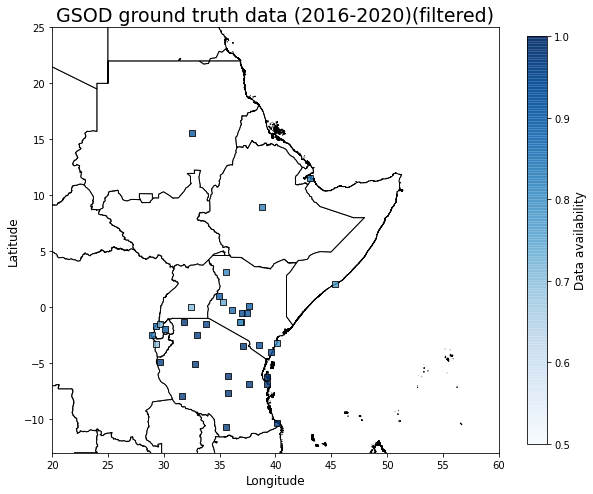

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(gsod_filt.LONGITUDE,gsod_filt.LATITUDE,c=gsod_filt.DATA_AVAILABILITY_2016_2020,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('GSOD ground truth data (2016-2020)(filtered)',fontsize = 19)
plt.xlim([20,60])
plt.ylim([-13,25])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/GSOD_filt.png')

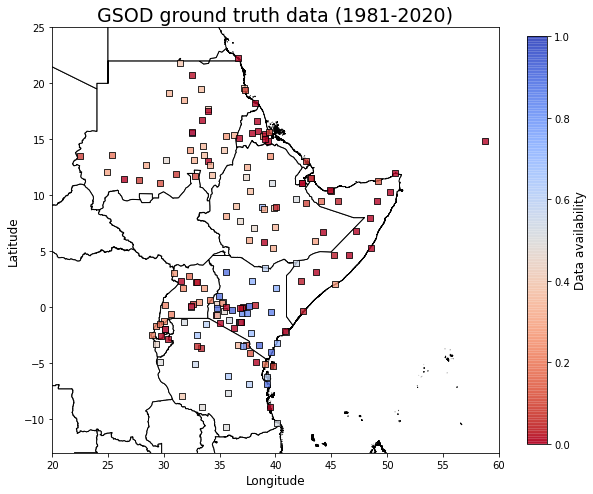

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(gsod_all.LONGITUDE,gsod_all.LATITUDE,c=gsod_all.DATA_AVAILABILITY_1981_2020,marker='s',cmap='coolwarm_r',vmin=0,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('GSOD ground truth data (1981-2020)',fontsize = 19)
plt.xlim([20,60])
plt.ylim([-13,25])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)


plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/GSOD_unfilt.png')

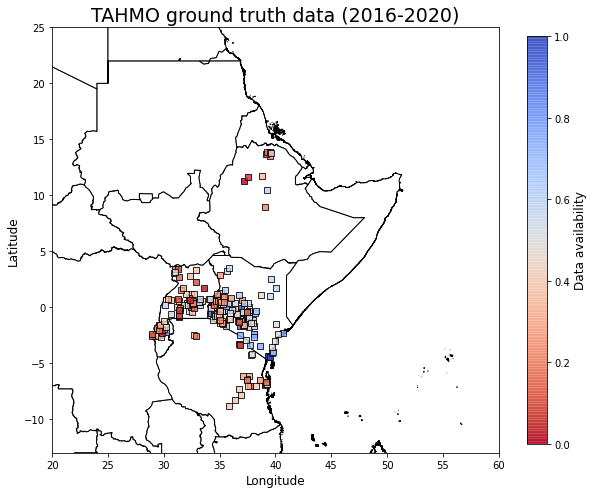

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(tahmo_metadata.longitude,tahmo_metadata.latitude,c=tahmo_metadata.data_availability,marker='s',cmap='coolwarm_r',vmin=0,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('TAHMO ground truth data (2016-2020)',fontsize = 19)
plt.xlim([20,60])
plt.ylim([-13,25])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/TAHMO_unfilt.png')

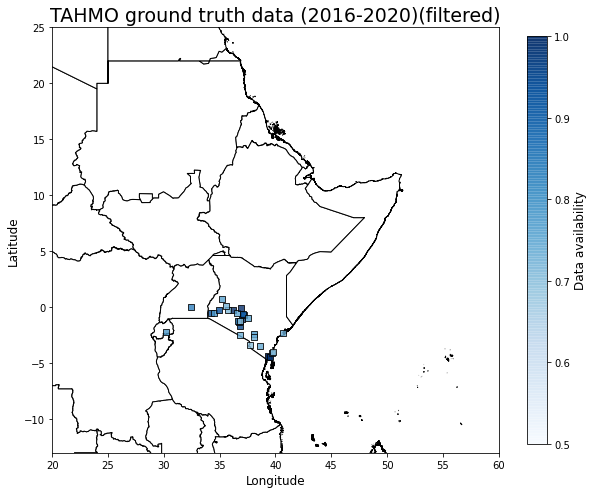

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(tahmo_filt.longitude,tahmo_filt.latitude,c=tahmo_filt.data_availability,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('TAHMO ground truth data (2016-2020)(filtered)',fontsize = 19)
plt.xlim([20,60])
plt.ylim([-13,25])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/TAHMO_filt.png')

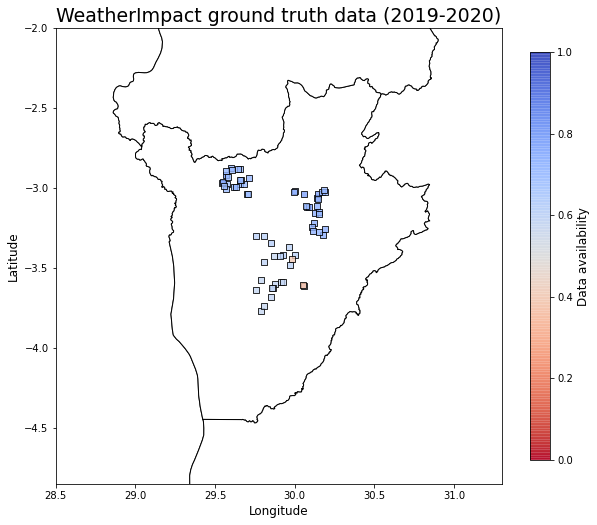

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(burundi_all.Longitude,burundi_all.Latitude,c=burundi_all.Data_availability,marker='s',cmap='coolwarm_r',vmin=0,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('WeatherImpact ground truth data (2019-2020)',fontsize = 19)
plt.xlim([28.5,31.3])
plt.ylim([-4.85,-2])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/WI_unfilt.png')

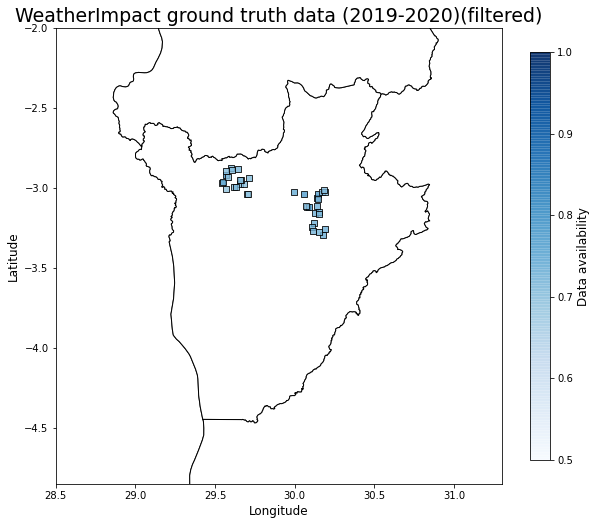

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(burundi_filt.Longitude,burundi_filt.Latitude,c=burundi_filt.Data_availability,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('WeatherImpact ground truth data (2019-2020)(filtered)',fontsize = 19)
plt.xlim([28.5,31.3])
plt.ylim([-4.85,-2])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/WI_filt.png')

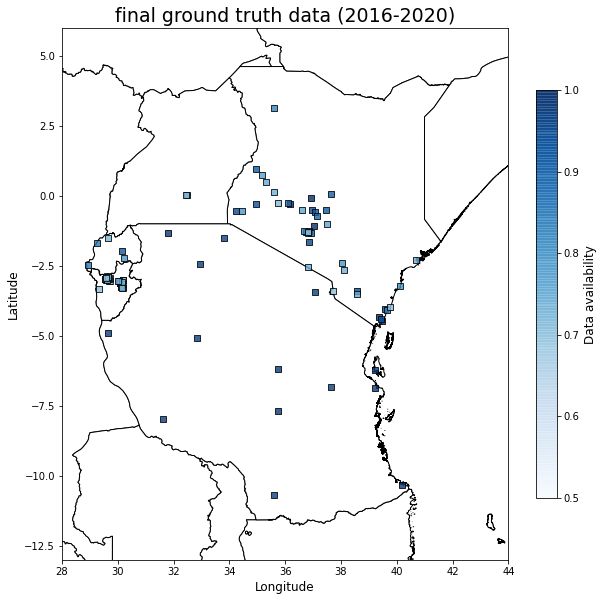

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(final_filt.LONGITUDE,final_filt.LATITUDE,c=final_filt.DATA_AVAILABILITY_2016_2020,marker='s',cmap='Blues',vmin=0.5,vmax=1,alpha=0.8,edgecolors='black')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('final ground truth data (2016-2020)',fontsize = 19)
plt.xlim([28,44])
plt.ylim([-13,6])

cb = plt.colorbar(shrink=0.75)
cb.set_label(label = 'Data availability',fontsize=12)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_final.png')

In [ ]:
ken_filt = final_filt[final_filt.ISO3C == 'KEN']
tza_filt = final_filt[final_filt.ISO3C == 'TZA']
rwa_filt = final_filt[final_filt.ISO3C == 'RWA']
uga_filt = final_filt[final_filt.ISO3C == 'UGA']
bdi_filt = final_filt[final_filt.ISO3C == 'BDI']
print(final_filt.SOURCE.unique())

ken_filt_gsod = ken_filt[ken_filt.SOURCE == 'GSOD']
ken_filt_tahmo = ken_filt[ken_filt.SOURCE == 'TAHMO']
ken_filt_wi = ken_filt[ken_filt.SOURCE == 'WEATHER_IMPACT']

tza_filt_gsod = tza_filt[tza_filt.SOURCE == 'GSOD']
tza_filt_tahmo = tza_filt[tza_filt.SOURCE == 'TAHMO']
tza_filt_wi = tza_filt[tza_filt.SOURCE == 'WEATHER_IMPACT']

rwa_filt_gsod = rwa_filt[rwa_filt.SOURCE == 'GSOD']
rwa_filt_tahmo = rwa_filt[rwa_filt.SOURCE == 'TAHMO']
rwa_filt_wi = rwa_filt[rwa_filt.SOURCE == 'WEATHER_IMPACT']

uga_filt_gsod = uga_filt[uga_filt.SOURCE == 'GSOD']
uga_filt_tahmo = uga_filt[uga_filt.SOURCE == 'TAHMO']
uga_filt_wi = uga_filt[uga_filt.SOURCE == 'WEATHER_IMPACT']

bdi_filt_gsod = bdi_filt[bdi_filt.SOURCE == 'GSOD']
bdi_filt_tahmo = bdi_filt[bdi_filt.SOURCE == 'TAHMO']
bdi_filt_wi = bdi_filt[bdi_filt.SOURCE == 'WEATHER_IMPACT']

print(bdi_filt_gsod.columns)

['TAHMO' 'GSOD' 'WEATHER_IMPACT']
Index(['STNID', 'DATA_AVAILABILITY_2016_2020', 'NAME', 'ISO3C', 'LATITUDE',
       'LONGITUDE', 'ELEVATION', 'SOURCE'],
      dtype='object')


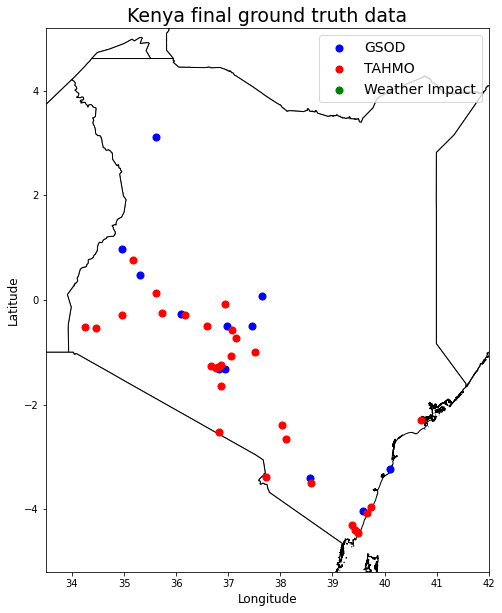

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(ken_filt_gsod.LONGITUDE,ken_filt_gsod.LATITUDE, c = 'Blue',s=50)
plt.scatter(ken_filt_tahmo.LONGITUDE, ken_filt_tahmo.LATITUDE, c= 'Red', s=50)
plt.scatter(ken_filt_wi.LONGITUDE, ken_filt_wi.LATITUDE, c= 'Green', s=50)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Kenya final ground truth data', fontsize = 19)
plt.xlim([33.5,42])
plt.ylim([-5.2,5.2])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_Kenya.png')

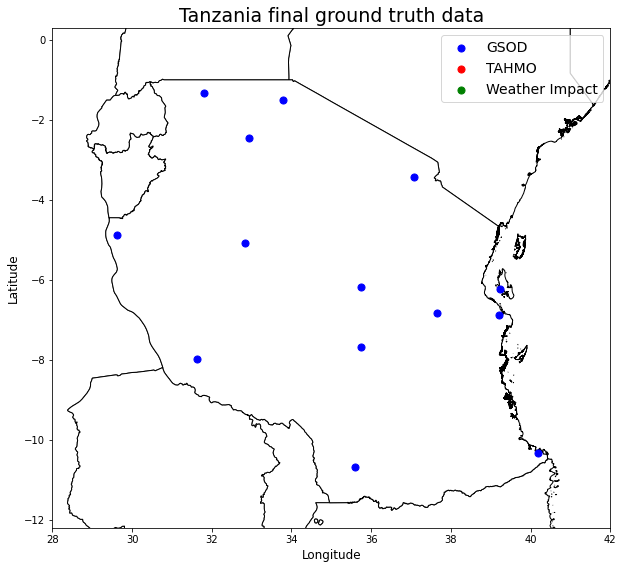

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(tza_filt_gsod.LONGITUDE,tza_filt_gsod.LATITUDE, c = 'Blue',s=50)
plt.scatter(tza_filt_tahmo.LONGITUDE, tza_filt_tahmo.LATITUDE, c= 'Red', s=50)
plt.scatter(tza_filt_wi.LONGITUDE, tza_filt_wi.LATITUDE, c= 'Green', s=50)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Tanzania final ground truth data', fontsize = 19)
# plt.xlim([20,60])
# plt.ylim([-13,25])
plt.xlim([28,42])
plt.ylim([-12.2,0.3])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_Tanzania.png')

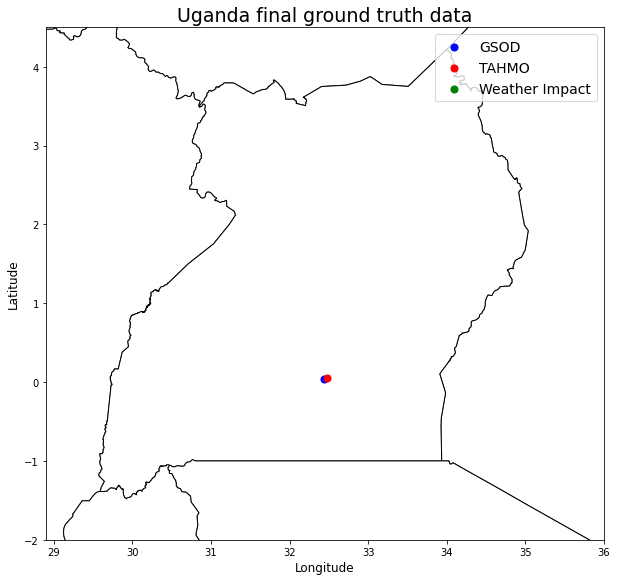

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(uga_filt_gsod.LONGITUDE,uga_filt_gsod.LATITUDE, c = 'Blue',s=50)
plt.scatter(uga_filt_tahmo.LONGITUDE, uga_filt_tahmo.LATITUDE, c= 'Red', s=50)
plt.scatter(uga_filt_wi.LONGITUDE, uga_filt_wi.LATITUDE, c= 'Green', s=50)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Uganda final ground truth data', fontsize = 19)
plt.xlim([28.9,36])
plt.ylim([-2,4.5])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_Uganda.png')

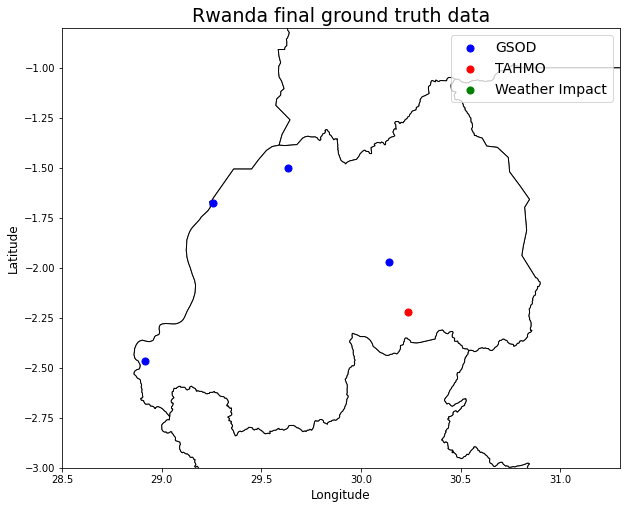

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(rwa_filt_gsod.LONGITUDE,rwa_filt_gsod.LATITUDE, c = 'Blue',s=50)
plt.scatter(rwa_filt_tahmo.LONGITUDE, rwa_filt_tahmo.LATITUDE, c= 'Red', s=50)
plt.scatter(rwa_filt_wi.LONGITUDE, rwa_filt_wi.LATITUDE, c= 'Green', s=50)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Rwanda final ground truth data', fontsize = 19)
plt.xlim([28.5,31.3])
plt.ylim([-3,-0.8])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_Rwanda.png')

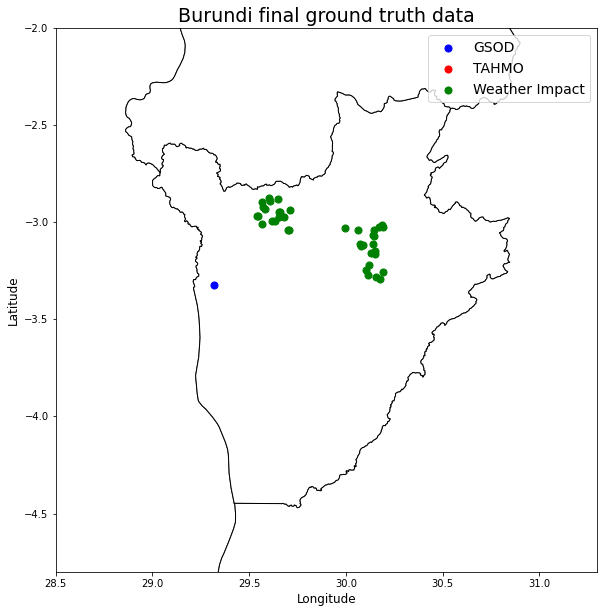

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(bdi_filt_gsod.LONGITUDE,bdi_filt_gsod.LATITUDE, c = 'Blue',s=50)
plt.scatter(bdi_filt_tahmo.LONGITUDE, bdi_filt_tahmo.LATITUDE, c= 'Red', s=50)
plt.scatter(bdi_filt_wi.LONGITUDE, bdi_filt_wi.LATITUDE, c= 'Green', s=50)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.title('Burundi final ground truth data', fontsize = 19)
# plt.xlim([20,60])
# plt.ylim([-13,25])
plt.xlim([28.5,31.3])
plt.ylim([-4.8,-2])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/Ground_truth_Burundi.png')

In [ ]:
print(gsod_filt.columns)
print(tahmo_filt.columns)
print(burundi_filt.columns)

Index(['STNID', 'DATA_AVAILABILITY_1981_2020', 'DATA_AVAILABILITY_2016_2020',
       'DATA_AVAILABILITY_2017_2020', 'DATA_AVAILABILITY_2019_2020',
       'STNID_METADATA', 'NAME', 'ISO3C', 'LATITUDE', 'LONGITUDE',
       'ELEVATION'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'station code', 'name', 'country',
       'installation height (m)', 'latitude', 'longitude', 'elevation (m)',
       'timezone', 'data_availability'],
      dtype='object')
Index(['UMVA ID', 'Latitude', 'Longitude', 'Data_availability'], dtype='object')


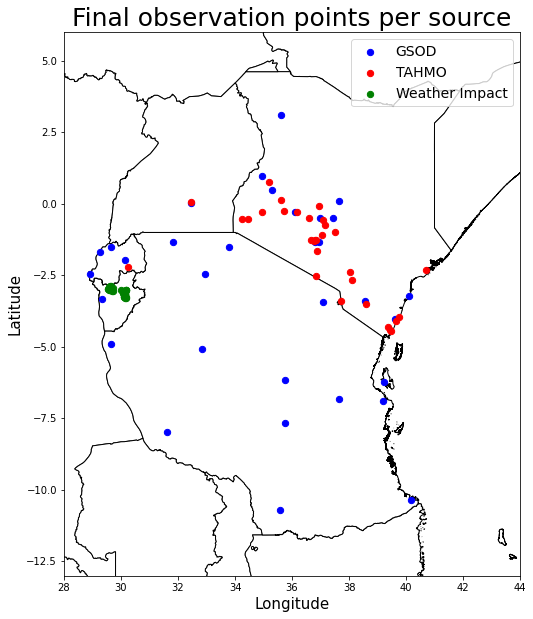

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(gsod_filt.LONGITUDE,gsod_filt.LATITUDE, c = 'Blue',s=40)
plt.scatter(tahmo_filt.longitude, tahmo_filt.latitude, c= 'Red', s=40)
plt.scatter(burundi_filt.Longitude,burundi_filt.Latitude, c= 'Green', s=40)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
plt.title('Final observation points per source',fontsize = 25)
plt.xlim([28,44])
plt.ylim([-13,6])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

# plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/observationsource.png')

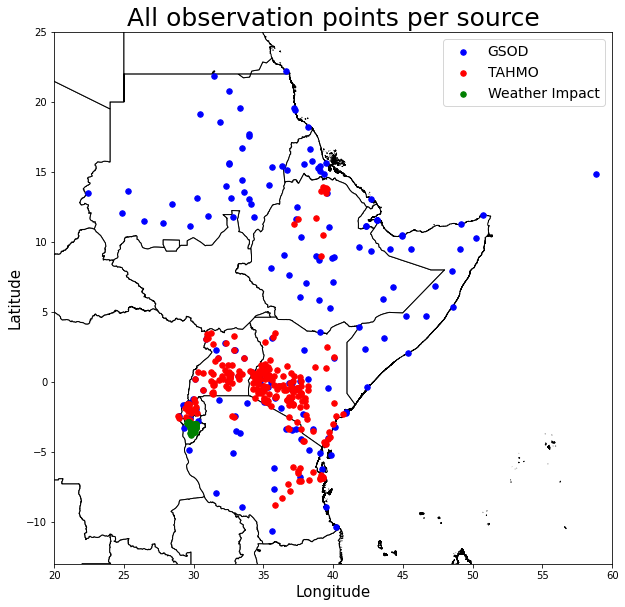

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

africa.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
plt.scatter(gsod_all.LONGITUDE,gsod_all.LATITUDE, c = 'Blue',s=30)
plt.scatter(tahmo_metadata.longitude, tahmo_metadata.latitude, c= 'Red', s=30)
plt.scatter(burundi_all.Longitude,burundi_all.Latitude, c= 'Green', s=30)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
plt.title('All observation points per source',fontsize = 25)
plt.xlim([20,60])
plt.ylim([-13,25])
lg = ax.legend(('GSOD','TAHMO','Weather Impact'),prop={"size":14},loc=0)

plt.savefig('/content/gdrive/MyDrive/rainfall-forecast/station_data/Final results_csv/Graphs/observationsource_all.png')